<a href="https://colab.research.google.com/github/Rohin107/codingground/blob/master/Predict_JKM_FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: predict future trend with prophet

from prophet import Prophet
from prophet.plot import plot_components
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('/content/JKM_15122023.csv')


In [ ]:
# prompt: change ds column to date in YYYY-MM-DD format

df['ds'] = pd.to_datetime(df['ds'], format='%d-%m-%Y')


In [ ]:
df.head()

,ds,y
0,2023-12-14,12.266
1,2023-12-13,11.788
2,2023-12-12,12.562
3,2023-12-11,12.790
4,2023-12-08,14.764


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzezxl8vf/jcg2yvyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzezxl8vf/vclz9a52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42898', 'data', 'file=/tmp/tmpzezxl8vf/jcg2yvyq.json', 'init=/tmp/tmpzezxl8vf/vclz9a52.json', 'output', 'file=/tmp/tmpzezxl8vf/prophet_modelfoiws9qh/prophet_model-20231218111041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


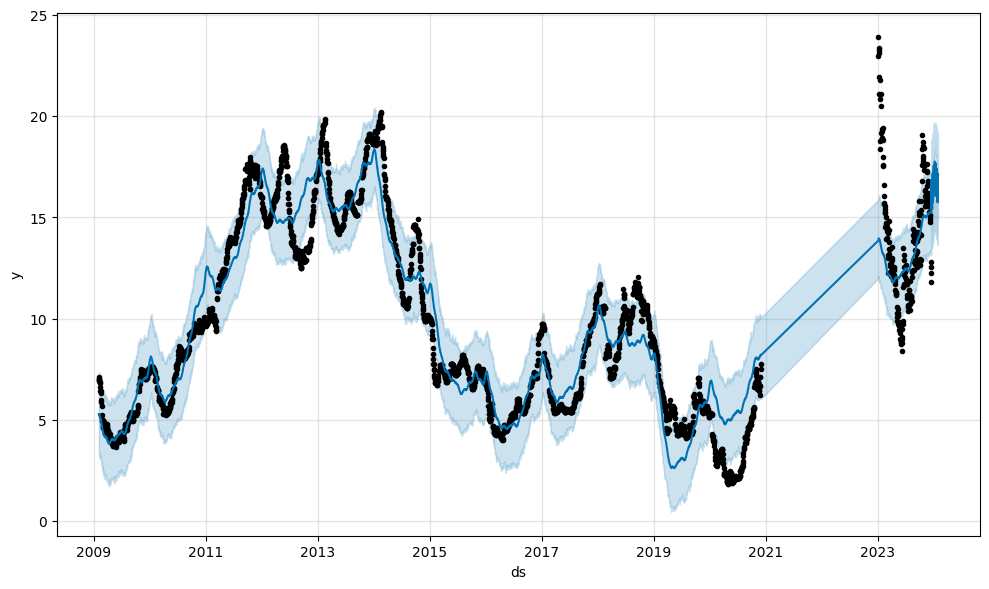

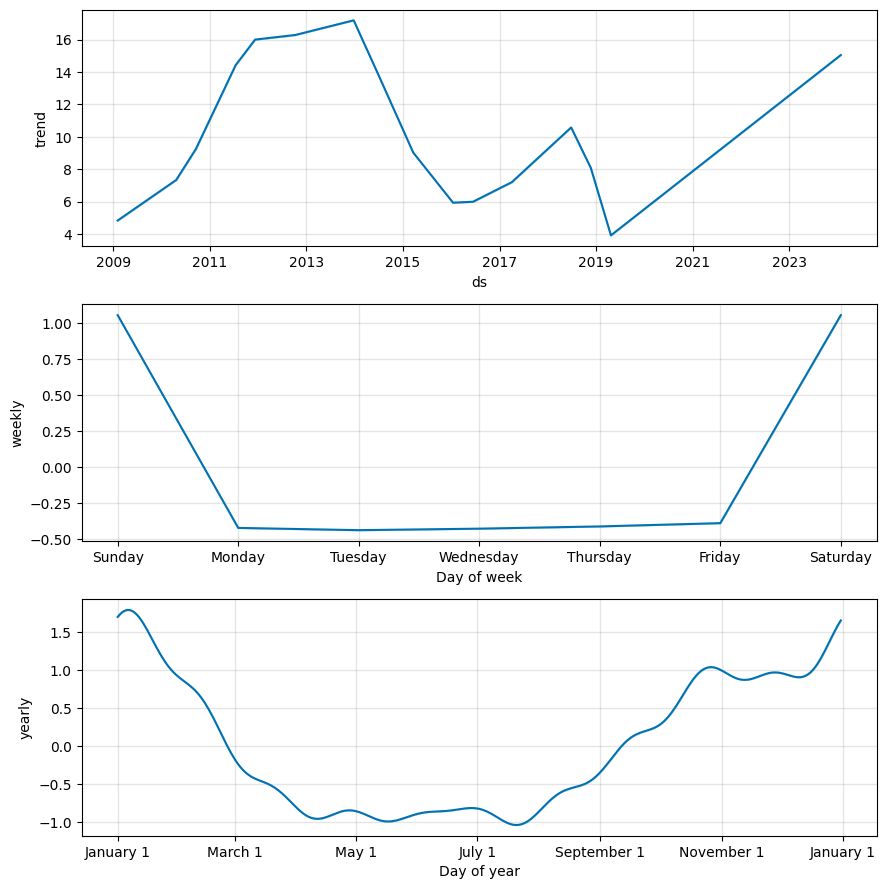

In [ ]:
# Create the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Make predictions for the future
future = model.make_future_dataframe(periods=45)
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the components of the forecast
fig2 = plot_components(model, forecast)
plt.show()

forecast.to_csv("forecast_JKM.csv")
